Installing Necessary Packages

In [179]:
# Install Pandas package

!pip install pandas
import pandas as pd

# Matplotlib package installation

!pip install matplotlib
import matplotlib.pyplot as plt

# Seaborn package installation

!pip install seaborn
import seaborn as sns

Customer Dataset

In [274]:
# Read the dataset

df_customer = pd.read_csv(r"C:\Users\Blesso\Desktop\Python Learning\DS\Capstone Projects\Project 2\Data Set\Customers.csv", encoding= 'latin1')
df_customer

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


Data Preprocessing

In [275]:
df_customer.columns.values

array(['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent', 'Birthday'], dtype=object)

In [276]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [277]:
# looking for NaN values

df_customer.isnull().values.any()  # looking for NaN values

True

In [184]:
df_customer.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [278]:
null_rows = df_customer[df_customer['State Code'].isnull()]
print("Rows with null values in 'State Code':")
null_rows

Rows with null values in 'State Code':


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [279]:
df_customer = df_customer.drop(['State Code', 'Zip Code', 'Name'], axis=1)
df_customer

,CustomerKey,Gender,City,State,Country,Continent,Birthday
0,301,Female,WANDEARAH EAST,South Australia,Australia,Australia,7/3/1939
1,325,Female,MOUNT BUDD,Western Australia,Australia,Australia,9/27/1979
2,554,Female,WINJALLOK,Victoria,Australia,Australia,5/26/1947
3,786,Male,MIDDLE RIVER,South Australia,Australia,Australia,9/17/1957
4,1042,Male,TAWONGA SOUTH,Victoria,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...
15261,2099600,Female,Houston,Texas,United States,North America,3/25/1936
15262,2099618,Male,Mclean,Virginia,United States,North America,2/16/1992
15263,2099758,Male,Wilmington,North Carolina,United States,North America,11/9/1937
15264,2099862,Female,Riverside,California,United States,North America,10/12/1937


In [280]:
df_customer['Birthday'] = pd.to_datetime(df_customer['Birthday'])
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   City         15266 non-null  object        
 3   State        15266 non-null  object        
 4   Country      15266 non-null  object        
 5   Continent    15266 non-null  object        
 6   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 835.0+ KB


In [281]:
# Checking for duplicates

df_customer[df_customer.duplicated()]

,CustomerKey,Gender,City,State,Country,Continent,Birthday


In [282]:
# Age

df_customer['Age'] = (pd.Timestamp.now() - df_customer['Birthday']).dt.days // 365  # Calculate age
df_customer = df_customer.drop('Birthday', axis=1)

df_customer

,CustomerKey,Gender,City,State,Country,Continent,Age
0,301,Female,WANDEARAH EAST,South Australia,Australia,Australia,85
1,325,Female,MOUNT BUDD,Western Australia,Australia,Australia,45
2,554,Female,WINJALLOK,Victoria,Australia,Australia,77
3,786,Male,MIDDLE RIVER,South Australia,Australia,Australia,67
4,1042,Male,TAWONGA SOUTH,Victoria,Australia,Australia,59
...,...,...,...,...,...,...,...
15261,2099600,Female,Houston,Texas,United States,North America,88
15262,2099618,Male,Mclean,Virginia,United States,North America,32
15263,2099758,Male,Wilmington,North Carolina,United States,North America,87
15264,2099862,Female,Riverside,California,United States,North America,87


In [283]:
# Rename the columns

df_customer = df_customer.rename(columns = {'State': 'State_customer', 'Country': 'Country_customer'})

EDA

In [319]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerKey       15266 non-null  int64 
 1   Gender            15266 non-null  object
 2   City              15266 non-null  object
 3   State_customer    15266 non-null  object
 4   Country_customer  15266 non-null  object
 5   Continent         15266 non-null  object
 6   Age               15266 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 835.0+ KB


Age Distribution

C:\Users\Blesso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


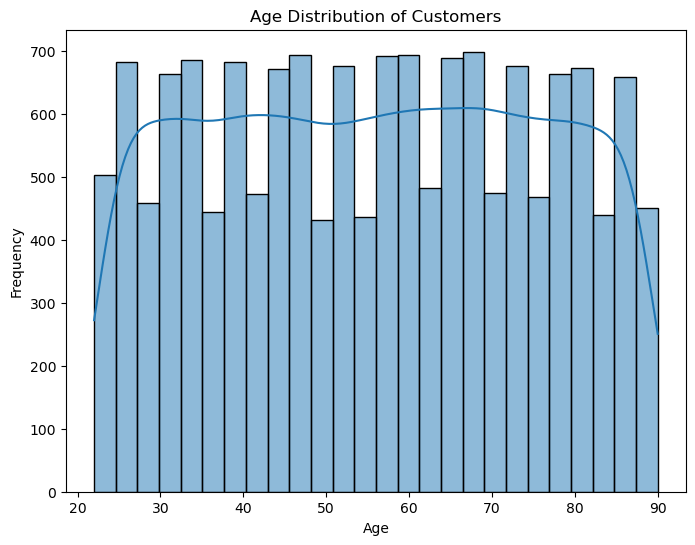

In [192]:
# Histogram plot
plt.figure(figsize=(8,6))
sns.histplot(df_customer['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Gender Distribution of Customers

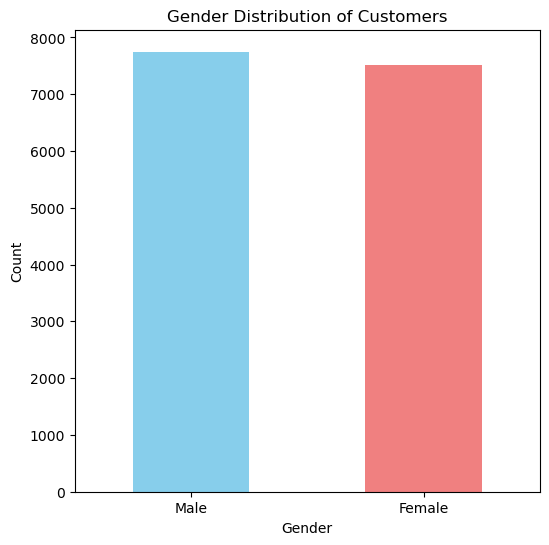

In [193]:
# Bar plot
plt.figure(figsize=(6,6))
df_customer['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Age Distribution by Gender

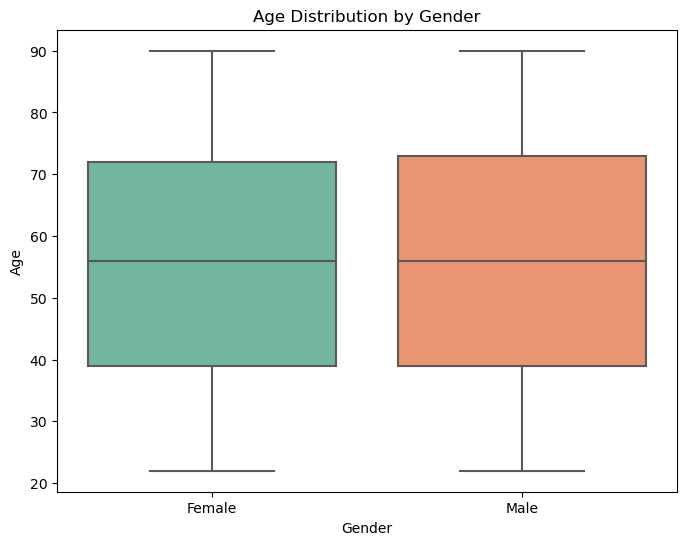

In [194]:
# Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Age', data=df_customer, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

Country Distribution

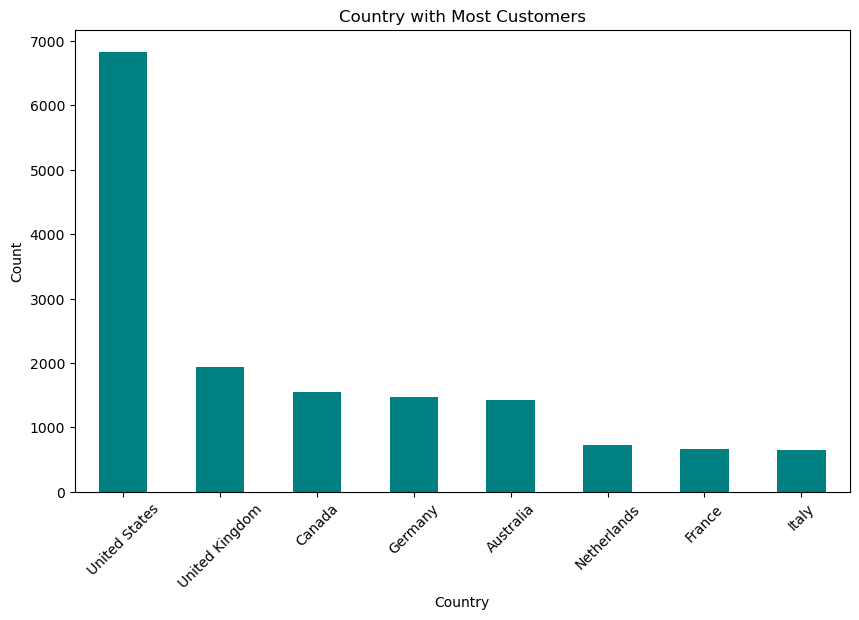

In [195]:
# Bar Plot
plt.figure(figsize=(10,6))
df_customer['Country_customer'].value_counts().plot(kind='bar', color='teal')
plt.title('Country with Most Customers')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

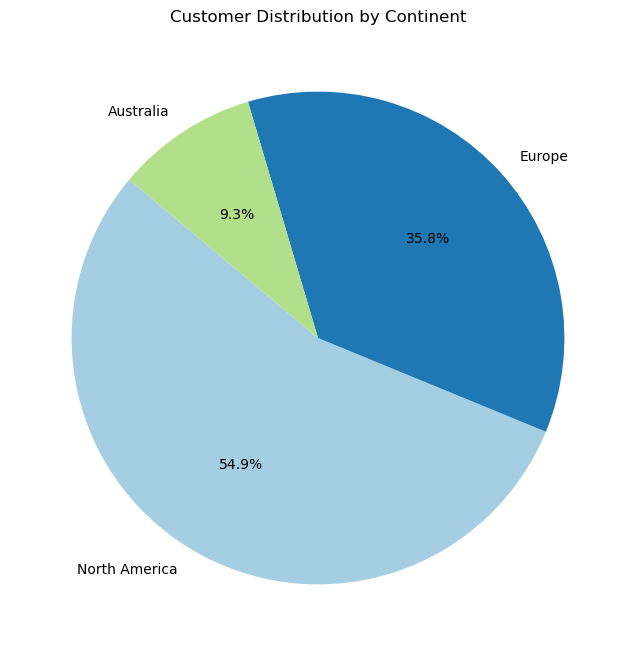

In [196]:
# Group by Continent count
continent_counts = df_customer['Continent'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
continent_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Customer Distribution by Continent")
plt.ylabel("")
plt.show()

Gender Proportion by Continent

<Figure size 1000x600 with 0 Axes>

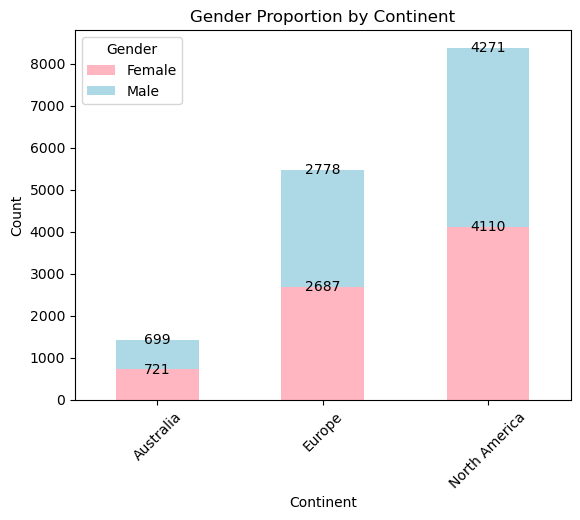

In [197]:
# Assuming 'data' is your DataFrame
gender_continent = pd.crosstab(df_customer['Continent'], df_customer['Gender'])

# Plotting the stacked bar chart
plt.figure(figsize=(10,6))
ax = gender_continent.plot(kind='bar', stacked=True, color=['lightpink', 'lightblue'])

# Adding the gender count labels on the bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),  # Height of the bar (count)
        (p.get_x() + p.get_width() / 2., p.get_height() + p.get_y()),  # Positioning the text
        ha='center', va='center',  # Horizontal and vertical alignment
        fontsize=10, color='black'
    )

# Adding title and labels
plt.title('Gender Proportion by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Store Dataset

In [285]:
# Read the dataset

df_store = pd.read_csv(r"C:\Users\Blesso\Desktop\Python Learning\DS\Capstone Projects\Project 2\Data Set\Stores.csv")
df_store

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


Data Preprocessing

In [289]:
df_store.isnull().sum()

StoreKey        0
Country         0
State           0
SquareMeters    0
OpenDate        0
dtype: int64

In [287]:
# Rename the columns

df_store = df_store.rename(columns = {'Square Meters': 'SquareMeters', 'Open Date': 'OpenDate'})

In [288]:
# Drop the null values

df_store = df_store.dropna()

In [290]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StoreKey      66 non-null     int64  
 1   Country       66 non-null     object 
 2   State         66 non-null     object 
 3   SquareMeters  66 non-null     float64
 4   OpenDate      66 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.1+ KB


In [291]:
# Converting the 'Open Date' to date format

df_store['OpenDate'] = pd.to_datetime(df_store['OpenDate'])

In [292]:
# Checking for duplicates

df_store[df_store.duplicated()]

,StoreKey,Country,State,SquareMeters,OpenDate


In [293]:
df_store.columns.values

array(['StoreKey', 'Country', 'State', 'SquareMeters', 'OpenDate'],
      dtype=object)

In [294]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   StoreKey      66 non-null     int64         
 1   Country       66 non-null     object        
 2   State         66 non-null     object        
 3   SquareMeters  66 non-null     float64       
 4   OpenDate      66 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.1+ KB


EDA

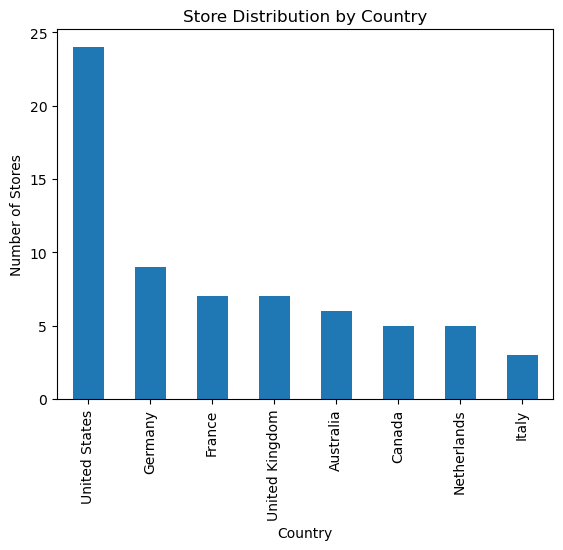

In [206]:
# Count of stores by country
country_count = df_store['Country'].value_counts()
country_count.plot(kind='bar')
plt.title('Store Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Stores')
plt.show()

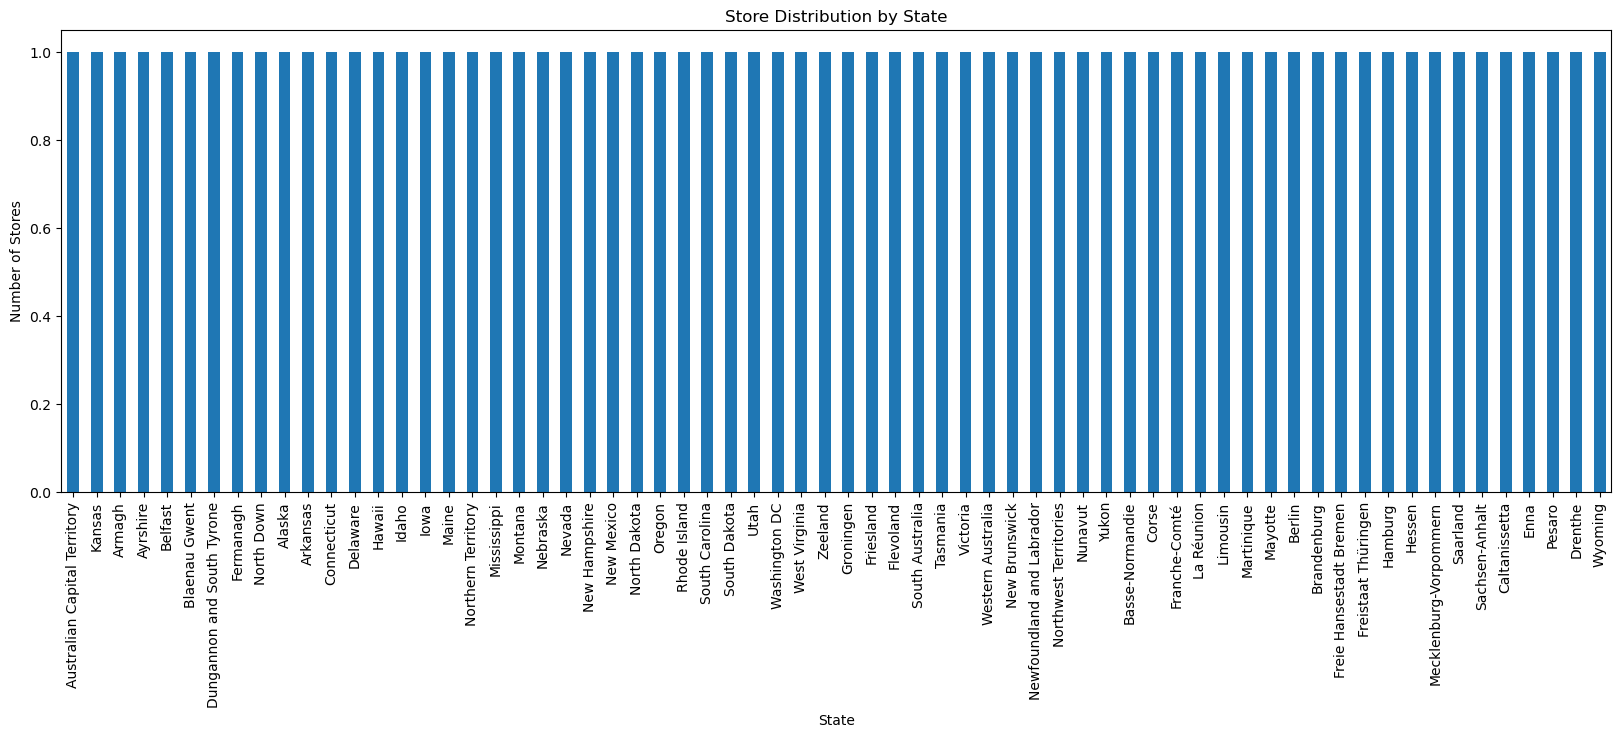

In [207]:
# Count of stores by state
state_count = df_store['State'].value_counts()
plt.figure(figsize=(20,6))
state_count.plot(kind='bar')
plt.title('Store Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Stores')
plt.show()

C:\Users\Blesso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


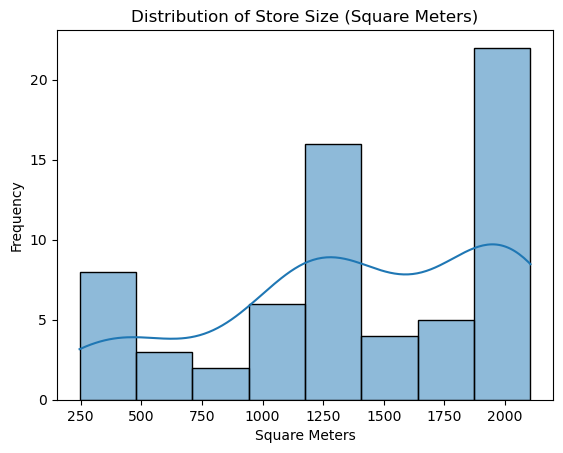

In [208]:
sns.histplot(df_store['SquareMeters'], kde=True)
plt.title('Distribution of Store Size (Square Meters)')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

Products Dataset

In [295]:
# Read the dataset

df_product = pd.read_csv(r"C:\Users\Blesso\Desktop\Python Learning\DS\Capstone Projects\Project 2\Data Set\Products.csv")
df_product[]

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


Data Preprocessing

In [296]:
# Looking for null values

df_product.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [297]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [298]:
# Rename the columns

df_product = df_product.rename(columns = {'Product Name': 'ProductName', 'Unit Cost USD': 'UnitCostUSD', 'Unit Price USD': 'UnitPriceUSD'})

In [299]:
df_product.columns.values

array(['ProductKey', 'ProductName', 'Brand', 'Color', 'UnitCostUSD',
       'UnitPriceUSD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category'], dtype=object)

In [301]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   ProductName     2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   UnitCostUSD     2517 non-null   object
 5   UnitPriceUSD    2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [300]:
# Checking for duplicates

df_product[df_product.duplicated()]

,ProductKey,ProductName,Brand,Color,UnitCostUSD,UnitPriceUSD,SubcategoryKey,Subcategory,CategoryKey,Category


EDA

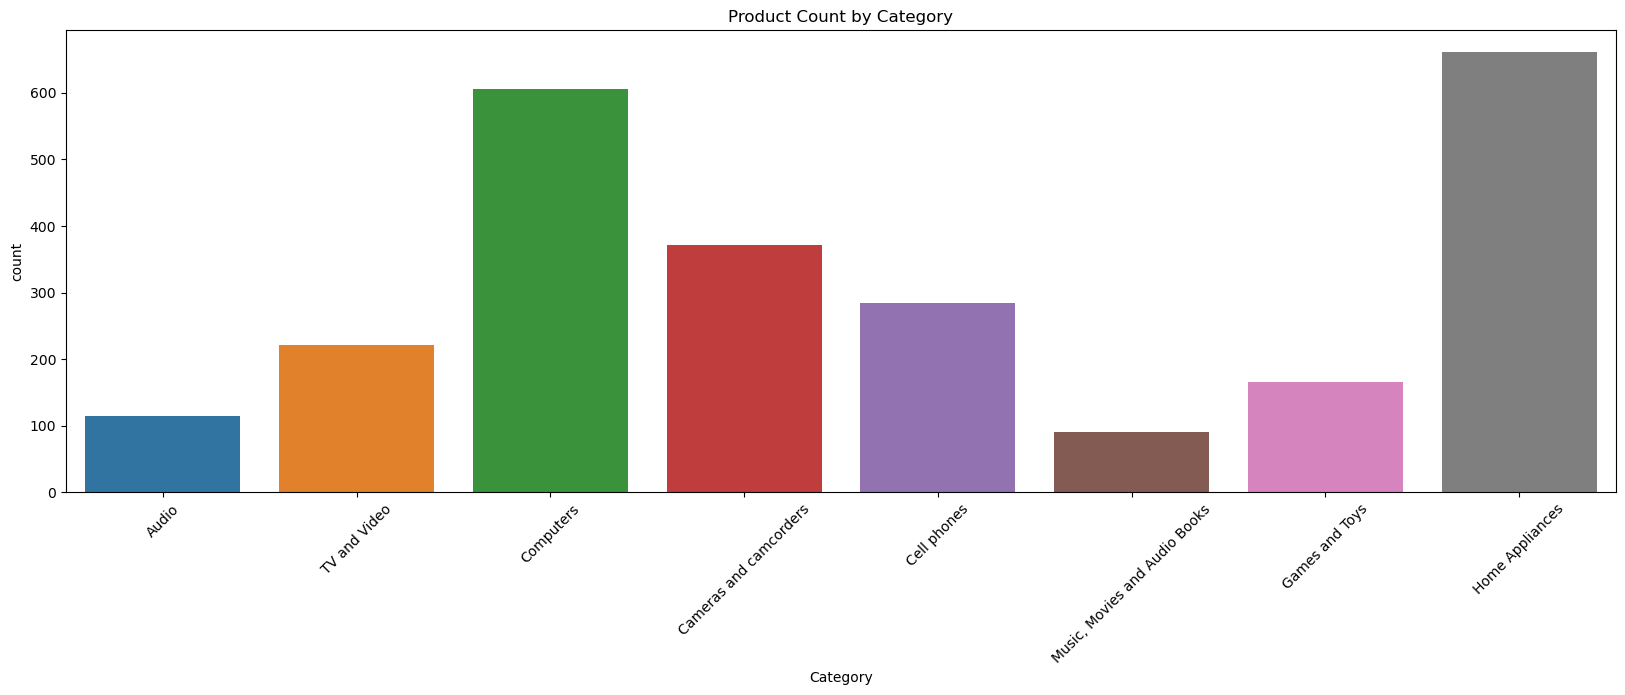

In [215]:
plt.figure(figsize=(20,6))
sns.countplot(x='Category', data=df_product)
plt.title('Product Count by Category')
plt.xticks(rotation=45)
plt.show()

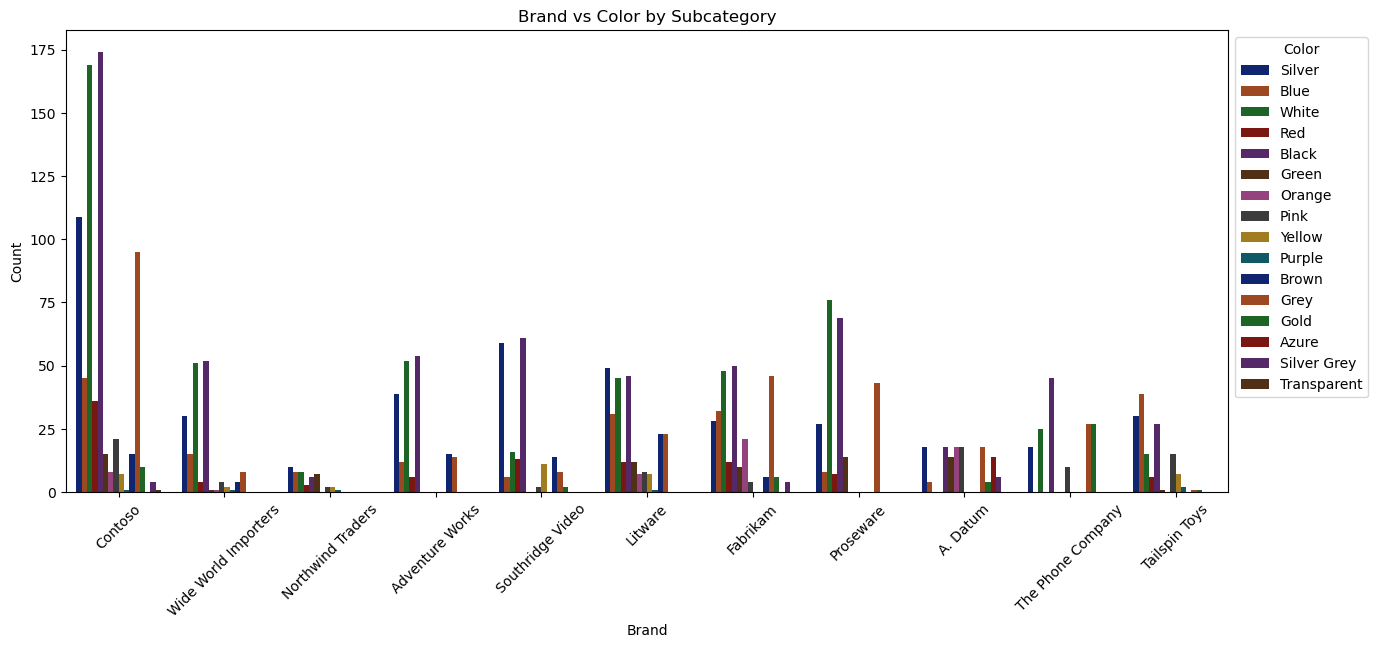

In [216]:
# Countplot to visualize the relationship between Brand, Color, and Subcategory
plt.figure(figsize=(15, 6))
sns.countplot(x='Brand', hue='Color', data=df_product, palette='dark', dodge=True)
plt.title('Brand vs Color by Subcategory')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Color', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

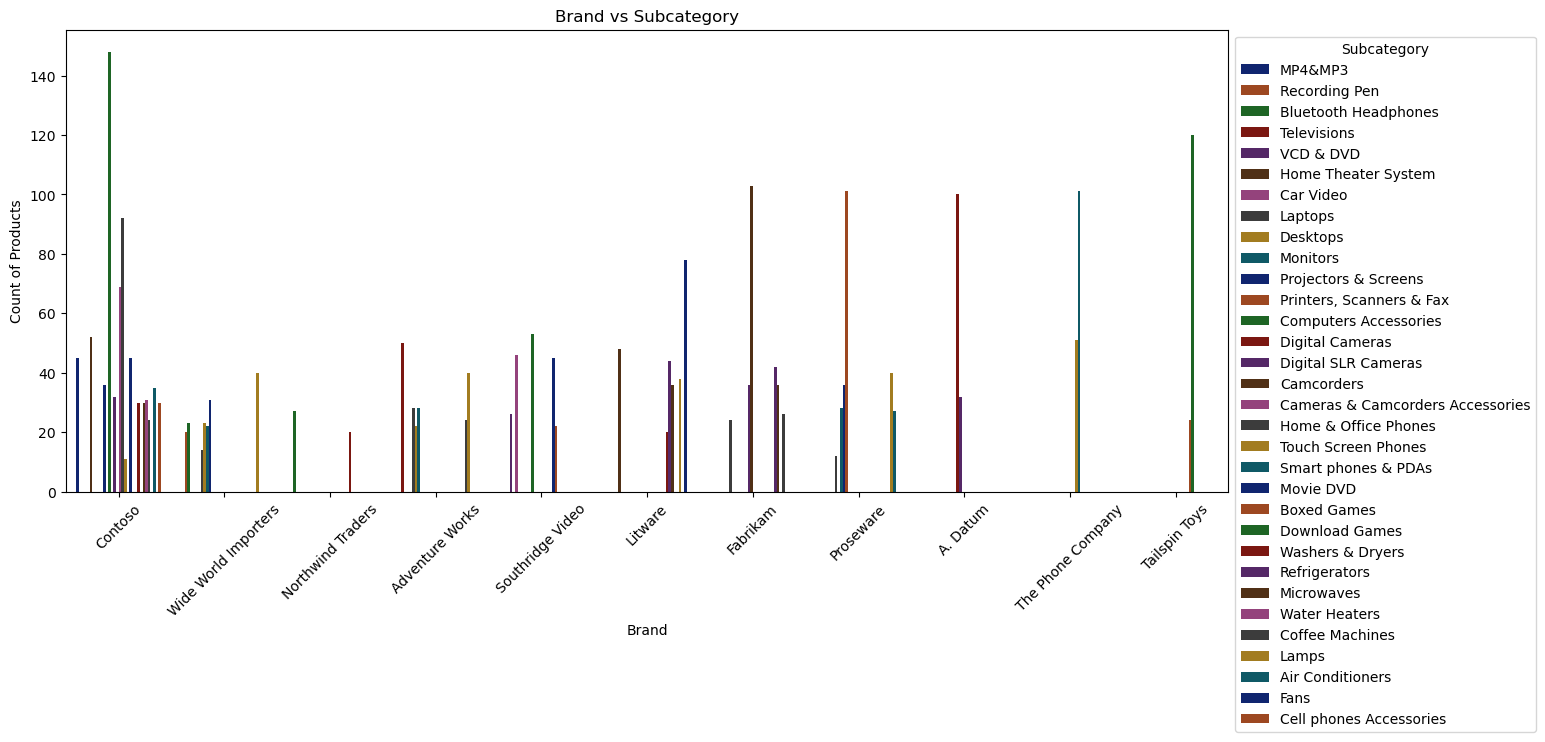

In [217]:
# Count plot between 'Brand' and 'Subcategory'
plt.figure(figsize=(15, 6))
sns.countplot(x='Brand', hue='Subcategory', data=df_product, palette='dark')

# Add title and labels
plt.title('Brand vs Subcategory')
plt.xlabel('Brand')
plt.ylabel('Count of Products')
plt.legend(title='Subcategory', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()


Sales Dataset

In [302]:
# Read the dataset

df_sales = pd.read_csv(r"C:\Users\Blesso\Desktop\Python Learning\DS\Capstone Projects\Project 2\Data Set\Sales.csv")
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [303]:
# Looking for null values

df_sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [304]:
# Rename the columns

df_sales = df_sales.rename(columns = {'Order Number': 'OrderNumber','Line Item': 'LineItem', 'Order Date': 'OrderDate', 'Currency Code': 'CurrencyCode'})

In [305]:
# Drop the deleivery data column

df_sales = df_sales.drop('Delivery Date', axis=1)

In [306]:
# Checking for duplicates

df_sales[df_sales.duplicated()]

,OrderNumber,LineItem,OrderDate,CustomerKey,StoreKey,ProductKey,Quantity,CurrencyCode


In [307]:
# Converting the Order Date to date format

df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])

In [321]:
df_sales

,OrderNumber,LineItem,OrderDate,CustomerKey,StoreKey,ProductKey,Quantity,CurrencyCode
0,366000,1,2016-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1269051,0,2007,1,USD
3,366002,1,2016-01-01,266019,0,1106,7,CAD
4,366002,2,2016-01-01,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD


Exchange_Rates Dataset

In [309]:
# Read the dataset

df_exchange = pd.read_csv(r"C:\Users\Blesso\Desktop\Python Learning\DS\Capstone Projects\Project 2\Data Set\Exchange_Rates.csv")
df_exchange

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [310]:
# Rename the columns

df_exchange = df_exchange.rename(columns = {'Date': 'Date_Exchange', 'Exchange': 'Exchange_Amount'})

In [311]:
# Looking for null values

df_exchange.isnull().sum()

Date_Exchange      0
Currency           0
Exchange_Amount    0
dtype: int64

In [312]:
# Checking for duplicates

df_exchange[df_exchange.duplicated()]

,Date_Exchange,Currency,Exchange_Amount


In [313]:
# Converting the Order Date to date format

df_exchange['Date_Exchange'] = pd.to_datetime(df_exchange['Date_Exchange'])

In [314]:
df_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Exchange    11215 non-null  datetime64[ns]
 1   Currency         11215 non-null  object        
 2   Exchange_Amount  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


EDA

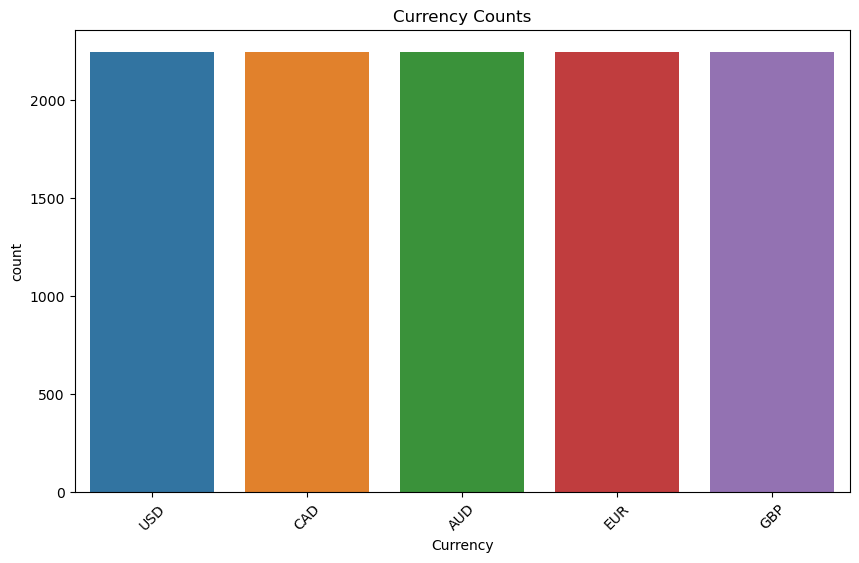

In [231]:
plt.figure(figsize=(10,6))
sns.countplot(x='Currency', data=df_exchange)
plt.title('Currency Counts')
plt.xticks(rotation=45)
plt.show()

In [243]:
df_exchange.columns.values

array(['Date_Exchange', 'Currency', 'Exchange_Amount'], dtype=object)

Importing the Dataset to Mysql DB

In [316]:
import pandas as pd
import mysql.connector

# Assuming preprocessed DataFrames: customer_df, store_df, product_df, sales_df, exchange_df

# MySQL connection setup
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password",
    database="data_spark"
)
cursor = conn.cursor()

# 1. Create tables in MySQL
table_queries = {
    "customer": """
        CREATE TABLE IF NOT EXISTS customer (
            CustomerKey INT PRIMARY KEY,
            Gender VARCHAR(10),
            City VARCHAR(50),
            State_customer VARCHAR(50),
            Country_customer VARCHAR(50),
            Continent VARCHAR(50),
            Age INT
        );
    """,
    "store": """
        CREATE TABLE IF NOT EXISTS store (
            StoreKey INT PRIMARY KEY,
            Country VARCHAR(50),
            State VARCHAR(50),
            SquareMeters FLOAT,
            OpenDate DATE
        );
    """,
    "product": """
        CREATE TABLE IF NOT EXISTS product (
            ProductKey INT PRIMARY KEY,
            ProductName VARCHAR(100),
            Brand VARCHAR(50),
            Color VARCHAR(30),
            UnitCostUSD VARCHAR(10),
            UnitPriceUSD VARCHAR(10),
            SubcategoryKey INT,
            Subcategory VARCHAR(50),
            CategoryKey INT,
            Category VARCHAR(50)
        );
    """,
    "sales": """
        CREATE TABLE IF NOT EXISTS sales (
            OrderNumber INT,
            LineItem INT,
            OrderDate DATE,
            CustomerKey INT,
            StoreKey INT,
            ProductKey INT,
            Quantity INT,
            CurrencyCode VARCHAR(10),
            PRIMARY KEY (OrderNumber, LineItem),
            FOREIGN KEY (CustomerKey) REFERENCES customer(CustomerKey),
            FOREIGN KEY (StoreKey) REFERENCES store(StoreKey),
            FOREIGN KEY (ProductKey) REFERENCES product(ProductKey)
        );
    """,
    "exchange": """
        CREATE TABLE IF NOT EXISTS exchange (
            Date_Exchange DATE,
            Currency VARCHAR(10),
            Exchange_Amount FLOAT,
            PRIMARY KEY (Date_Exchange, Currency)
        );
    """
}

for table, query in table_queries.items():
    cursor.execute(query)
conn.commit()

# 2. Insert data into tables
def insert_data(df, table_name, columns):
    for _, row in df.iterrows():
        placeholders = ", ".join(["%s"] * len(columns))
        sql = f"INSERT INTO {table_name} ({', '.join(columns)}) VALUES ({placeholders})"
        cursor.execute(sql, tuple(row))
    conn.commit()

# Insert data into each table
insert_data(customer_df, "customer", ['CustomerKey', 'Gender', 'City', 'State_customer', 'Country_customer', 'Continent', 'Age'])
insert_data(store_df, "store", ['StoreKey', 'Country', 'State', 'SquareMeters', 'OpenDate'])
insert_data(product_df, "product", ['ProductKey', 'ProductName', 'Brand', 'Color', 'UnitCostUSD', 'UnitPriceUSD', 'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category'])
insert_data(sales_df, "sales", ['OrderNumber', 'LineItem', 'OrderDate', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'CurrencyCode'])
insert_data(df_exchange, "exchange", ['Date_Exchange', 'Currency', 'Exchange_Amount'])

# Close connection
cursor.close()
conn.close()


Merge the Datasets

In [245]:

# Merge process
# Step 1: Merge sales.csv with customer.csv on 'CustomerKey'
merged_df = pd.merge(df_sales, df_customer, on='CustomerKey', how='inner')

# Step 2: Merge the result with store.csv on 'StoreKey'
merged_df = pd.merge(merged_df, df_store, on='StoreKey', how='inner')

# Step 3: Merge the result with product.csv on 'ProductKey'
merged_df = pd.merge(merged_df, df_product, on='ProductKey', how='inner')

# Step 4: Merge the result with exchange.csv

# Merge on 'OrderDate' and 'CurrencyCode' with 'Date_Exchange' and 'Currency'
merged_df = pd.merge(
    merged_df,
    df_exchange,
    left_on=['OrderDate', 'CurrencyCode'],
    right_on=['Date_Exchange', 'Currency'],
    how='inner'
)

# Drop unnecessary columns if needed
merged_df.drop(columns=['Date_Exchange', 'Currency'], inplace=True)

# Save the final merged dataset to a new CSV file
merged_df.to_csv("final_merged_dataset.csv", index=False)

print("Merged dataset saved as 'final_merged_dataset.csv'.")


Merged dataset saved as 'final_merged_dataset.csv'.
